# Audio Processing in Python



# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

### Processing a Noisy and Clean Signal

- There are two noisy and clean signals in the same folder
- Generate MFCC of both the Signals and report the differences

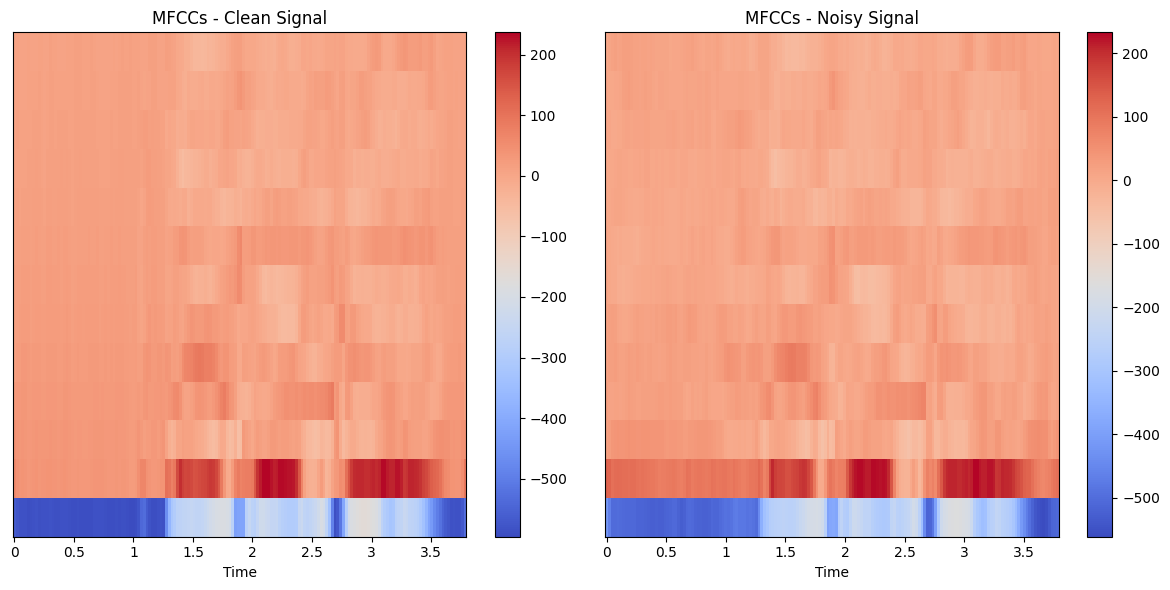

Mean MFCCs (Clean Signal): [-400.41855     102.394485     10.470034     25.018925     23.615515
    8.740903      4.6809416    21.438301      2.6346135    -0.82052577
    3.1148033     4.9494925     2.948112  ]
Mean MFCCs (Noisy Signal): [-367.76266     126.11772      10.656115     22.120777     21.972944
    8.43604      -1.4469063    16.65211       0.71076804   -2.673781
    4.0363216     5.0013638     3.1040828 ]
Variance of MFCCs (Clean Signal): [26358.848    6658.965     811.9918    428.6592    424.07797   424.2484
   420.5873    122.59056   255.3581    243.25102   140.4348    120.46455
   211.63277]
Variance of MFCCs (Noisy Signal): [17464.541    4203.103     800.1225    382.51102   474.80402   325.40164
   305.05237   196.18932   194.38387   170.12823   141.59357   121.56618
   206.60657]


In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio files
clean_signal, sr_clean = librosa.load('/content/Clean-Signal.wav', sr=None)
noisy_signal, sr_noisy = librosa.load('/content/Noisy-Signal.wav', sr=None)

# Ensure both signals have the same sampling rate
assert sr_clean == sr_noisy, "Sampling rates do not match"

# Generate MFCCs
mfcc_clean = librosa.feature.mfcc(y=clean_signal, sr=sr_clean, n_mfcc=13)
mfcc_noisy = librosa.feature.mfcc(y=noisy_signal, sr=sr_noisy, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('MFCCs - Clean Signal')
librosa.display.specshow(mfcc_clean, x_axis='time')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('MFCCs - Noisy Signal')
librosa.display.specshow(mfcc_noisy, x_axis='time')
plt.colorbar()

plt.tight_layout()
plt.show()

# Compute mean and variance of MFCCs for comparison
mean_mfcc_clean = np.mean(mfcc_clean, axis=1)
mean_mfcc_noisy = np.mean(mfcc_noisy, axis=1)

variance_mfcc_clean = np.var(mfcc_clean, axis=1)
variance_mfcc_noisy = np.var(mfcc_noisy, axis=1)

print("Mean MFCCs (Clean Signal):", mean_mfcc_clean)
print("Mean MFCCs (Noisy Signal):", mean_mfcc_noisy)

print("Variance of MFCCs (Clean Signal):", variance_mfcc_clean)
print("Variance of MFCCs (Noisy Signal):", variance_mfcc_noisy)


### Trimming and Processing the Signal
- The >Example.wav file contains is of a very large length.
- Plot the MFCC
- Trim the first 4 Seconds of Audio and plot the MFCC
- Observe the Changes



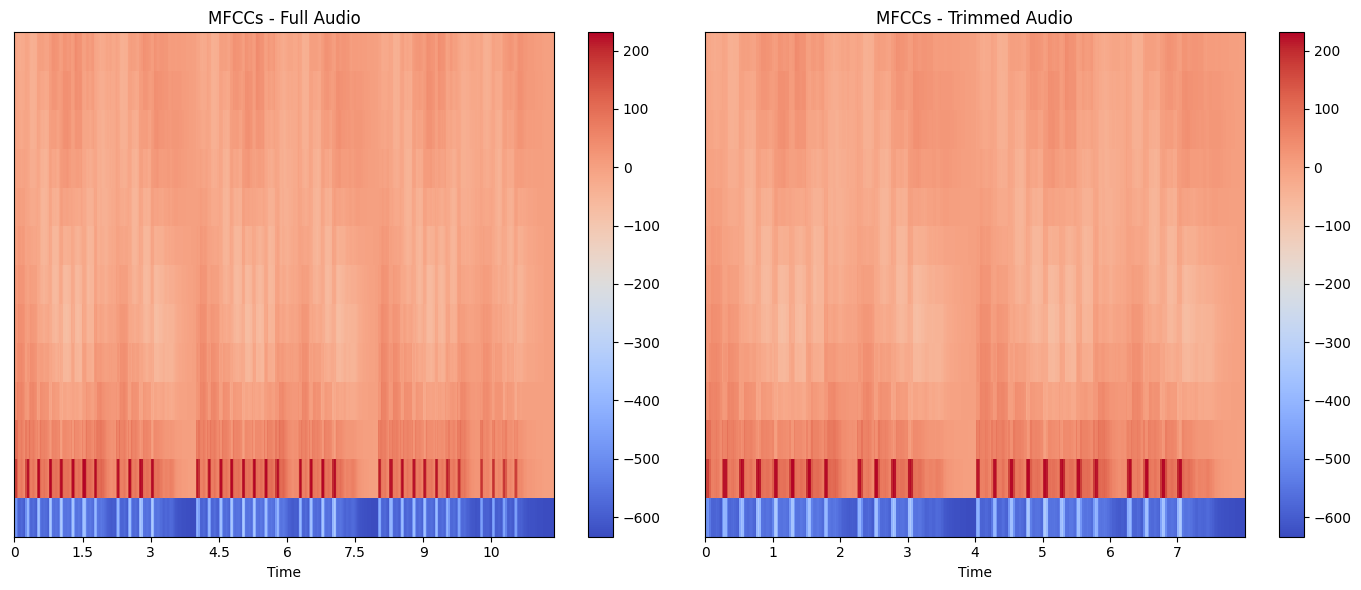

Mean MFCCs (Full Audio): [-5.4703149e+02  9.3490097e+01  4.3022720e+01  1.1886908e+01
 -6.0694256e+00 -1.8744884e+01 -2.3207802e+01 -2.1868750e+01
 -1.7259838e+01 -1.0832140e+01 -4.7848234e+00 -3.9803576e-01
  1.5905728e+00]
Mean MFCCs (Trimmed Audio): [-540.19745     99.561       43.871647    10.406379    -9.148434
  -22.262989   -25.50724    -22.909298   -17.205772    -9.853193
   -3.4382403    0.8165892    2.3178205]
Variance of MFCCs (Full Audio): [5537.365   4134.757    529.0665   507.81094  703.5549   741.6514
  532.0927   324.96066  245.11395  304.70203  397.61774  422.2477
  361.24072]
Variance of MFCCs (Trimmed Audio): [5882.478   4111.358    536.17755  551.59576  775.6931   785.25977
  548.5325   332.39645  264.07498  338.63864  428.38962  434.30548
  353.97784]


In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# 1. Load the Full Audio File
file_path = '/content/Example.wav'
audio, sr = librosa.load(file_path, sr=None)

# 2. Compute and Plot the MFCCs for the Entire Audio
mfcc_full = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('MFCCs - Full Audio')
librosa.display.specshow(mfcc_full, x_axis='time')
plt.colorbar()

# 3. Trim the First 4 Seconds of Audio
trim_duration = 4  # Duration to trim in seconds
trim_samples = trim_duration * sr  # Convert duration to sample count
trimmed_audio = audio[:int(trim_samples)]

# 4. Compute and Plot the MFCCs for the Trimmed Audio
mfcc_trimmed = librosa.feature.mfcc(y=trimmed_audio, sr=sr, n_mfcc=13)

plt.subplot(1, 2, 2)
plt.title('MFCCs - Trimmed Audio')
librosa.display.specshow(mfcc_trimmed, x_axis='time')
plt.colorbar()

plt.tight_layout()
plt.show()

# 5. Observe and Compare the Changes
# Display some statistics if needed for comparison
mean_mfcc_full = np.mean(mfcc_full, axis=1)
mean_mfcc_trimmed = np.mean(mfcc_trimmed, axis=1)

print("Mean MFCCs (Full Audio):", mean_mfcc_full)
print("Mean MFCCs (Trimmed Audio):", mean_mfcc_trimmed)

variance_mfcc_full = np.var(mfcc_full, axis=1)
variance_mfcc_trimmed = np.var(mfcc_trimmed, axis=1)

print("Variance of MFCCs (Full Audio):", variance_mfcc_full)
print("Variance of MFCCs (Trimmed Audio):", variance_mfcc_trimmed)
